In [59]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../homework1/')
from datahw1 import create_dataset
import sklearn.linear_model as skl
import sklearn.metrics as skm

#### Task 4.1

In [45]:
x, y, X = create_dataset()

In [46]:
def beta_tilde(X, y):
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    ytilde = X @ beta
    return beta, ytilde

In [47]:
# From EX 2
beta_ex2, ytilde_ex2 = beta_tilde(X, y)

In [48]:
# Custom Ridge
def custom_ridge(_lambda, X, y):
    X_ridge = X.T.dot(X) + _lambda*np.eye((X.shape[1]))
    beta_ridge    = np.linalg.inv(X_ridge).dot(X.T).dot(y)
    ytilde_ridge = X @ beta_ridge
    return ytilde_ridge

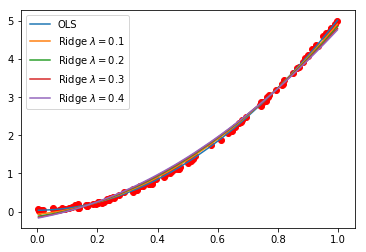

In [49]:
plt.scatter(x, y, color='red')
plt.plot(x, ytilde_ex2, label='OLS')
plt.plot(x, custom_ridge(0.1, X, y), label=r'Ridge $\lambda=0.1$')
plt.plot(x, custom_ridge(0.2, X, y), label=r'Ridge $\lambda=0.2$')
plt.plot(x, custom_ridge(0.3, X, y), label=r'Ridge $\lambda=0.3$')
plt.plot(x, custom_ridge(0.4, X, y), label=r'Ridge $\lambda=0.4$')
plt.legend()
plt.show()

#### Task 4.3

In [50]:
def var_beta(X, _lambda):
    vb = np.linalg.inv(X.T.dot(X) + _lambda*np.eye((X.shape[1])))
    return np.diag(vb)

In [51]:
_lambdas = np.linspace(0, 2, 50)
vb = np.empty((len(_lambdas), 3))
for i in range(len(_lambdas)):
    vb[i] = var_beta(X, _lambdas[i])

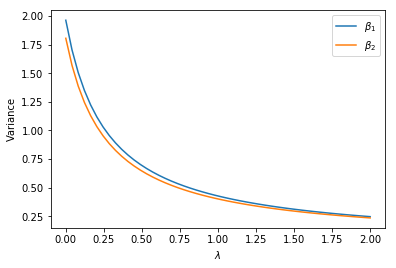

In [52]:
plt.plot(_lambdas, vb[:,1], label=r'$\beta_1$')
plt.plot(_lambdas, vb[:,2], label=r'$\beta_2$')
plt.xlabel(r'$\lambda$')
plt.ylabel('Variance')
plt.legend()
plt.show()

#### Task 4.4

In [57]:
def run_lass(_lambda, X, y):
    lass = skl.Lasso(alpha=_lambda).fit(X,y)
    lass_pred = lass.predict(X)
    return lass_pred

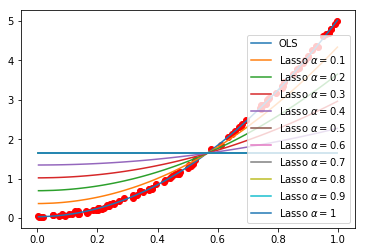

In [58]:
plt.scatter(x, y, color='red')
plt.plot(x, ytilde_ex2, label='OLS')
plt.plot(x, run_lass(0.1, X, y), label=r'Lasso $\alpha=0.1$')
plt.plot(x, run_lass(0.2, X, y), label=r'Lasso $\alpha=0.2$')
plt.plot(x, run_lass(0.3, X, y), label=r'Lasso $\alpha=0.3$')
plt.plot(x, run_lass(0.4, X, y), label=r'Lasso $\alpha=0.4$')
plt.plot(x, run_lass(0.5, X, y), label=r'Lasso $\alpha=0.5$')
plt.plot(x, run_lass(0.6, X, y), label=r'Lasso $\alpha=0.6$')
plt.plot(x, run_lass(0.7, X, y), label=r'Lasso $\alpha=0.7$')
plt.plot(x, run_lass(0.8, X, y), label=r'Lasso $\alpha=0.8$')
plt.plot(x, run_lass(0.9, X, y), label=r'Lasso $\alpha=0.9$')
plt.plot(x, run_lass(1, X, y), label=r'Lasso $\alpha=1$')
plt.legend()
plt.show()

#### 4.5

In [60]:
def mse_lasso_ridge(_lambda, X, y):
    lass = skl.Lasso(alpha=_lambda).fit(X,y)
    lass_pred = lass.predict(X)
    lass_mse = skm.mean_squared_error(y, lass_pred)
    
    ridge = skl.Ridge(alpha=_lambda).fit(X,y)
    ridge_pred = ridge.predict(X)
    ridge_mse = skm.mean_squared_error(y, ridge_pred)
    return lass_mse, ridge_mse

In [62]:
mses = np.empty((len(_lambdas), 2))
for i in range(len(_lambdas)):
    mses[i] = mse_lasso_ridge(_lambdas[i], X, y)

C:\Users\Sigmu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\Sigmu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sigmu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


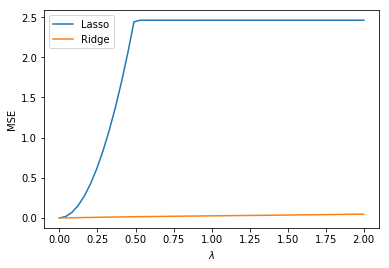

In [72]:
plt.plot(_lambdas, mses[:,0], label='Lasso')
plt.plot(_lambdas, mses[:,1], label='Ridge')
plt.xlabel(r'$\lambda$')
plt.ylabel('MSE')
plt.legend()
plt.show()